In [126]:
import json
import pandas as pd
from bs4 import BeautifulSoup
import requests
import sqlite3
from Full_Code import titles

In [3]:
new_url = 'https://www.rottentomatoes.com/m/black_panther_2018'

In [4]:
r = requests.get(new_url)
c = r.content
soup = BeautifulSoup(c, 'html.parser')

In [236]:
def movie_info(movie):    
    url = 'https://www.rottentomatoes.com/m/' + movie.replace(' ', '_')
    r = requests.get(url)
    c = r.content
    soup = BeautifulSoup(c, 'html.parser')
    director = []
    writer = []
    movies_info = {}
    #To get directors, writers, box office, movie duration, and when it was released in theaters
    info = soup.find_all('div', class_='meta-value')
    
    try:
        for directors in info[2].find_all('a'):
            director.append(directors.text)

        movies_info['Director'] = director

        for writers in info[3].find_all('a'):
            writer.append(writers.text)

        movies_info['Writers'] = writer

        movies_info['Release Date'] = info[4].time.string

        movies_info['Box Office Info'] = info[6].text

#         movies_info['Movie Duration'] = info[7].time.text.split('\n')[1].strip()

        #to get actor information
        actor_info = soup.find_all('section', id='movie-cast')

        all_actors = []
        for name in actor_info[0].find_all('span'):
            all_actors.append(name.string)

        actresses = []
        for names in all_actors[::2]:
            actresses.append(names)
            movies_info['Actors'] = actresses
        return movies_info   
        
        with open("All_Data.json", 'w') as f:
                f.write(str(response.json()))
        
    except:
        pass

In [238]:
all_data = []
for all_movies in movies_search:
    all_data.append(movie_info(all_movies))

In [241]:
all_data

[{'Director': ['Peter Lord', 'Nick Park'],
  'Writers': ['Jack Rosenthal', 'Karey Kirkpatrick'],
  'Release Date': 'Jun 21, 2000',
  'Box Office Info': '$106,604,314',
  'Actors': ['\n                Mel Gibson\n            ',
   '\n                Miranda Richardson\n            ',
   '\n                Tony Haygarth\n            ',
   '\n                Julia Sawalha\n            ',
   '\n                Timothy Spall\n            ',
   '\n                Phil Daniels\n            ',
   '\n                Lynn Ferguson\n            ',
   '\n                Jane Horrocks\n            ',
   '\n                Imelda Staunton\n            ',
   '\n                Benjamin Whitrow\n            ',
   '\n                John Sharian\n            ',
   '\n                Jo Allen\n            ',
   '\n                Lisa Kay\n            ',
   '\n                Laura Strachan\n            ',
   None]},
 {'Director': ['Agnès Jaoui'],
  'Writers': ['Jean-Pierre Bacri', 'Agnès Jaoui'],
  'Re

In [208]:
all_data

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [209]:
    url = 'https://www.rottentomatoes.com/m/The_Taste_of_Others'
    r = requests.get(url)
    c = r.content
    soup = BeautifulSoup(c, 'html.parser')
    director = []
    writer = []
    movies_info = {}
    #To get directors, writers, box office, movie duration, and when it was released in theaters
    info = soup.find_all('div', class_='meta-value')
    info

[<div class="meta-value">R (For language and drug content)</div>,
 <div class="meta-value">
 <a href="/browse/opening/?genres=4">Art House &amp; International</a>, 
                              
                                 <a href="/browse/opening/?genres=6">Comedy</a>, 
                              
                                 <a href="/browse/opening/?genres=9">Drama</a>
 </div>,
 <div class="meta-value">
 <a href="/celebrity/agnes_jaoui">Agnès Jaoui</a>
 </div>,
 <div class="meta-value">
 <a href="/celebrity/jeanpierre_bacri">Jean-Pierre Bacri</a>, 
                              
                                 <a href="/celebrity/agnes_jaoui">Agnès Jaoui</a>
 </div>,
 <div class="meta-value">
 <time datetime="1999-12-31T16:00:00-08:00">Jan 1, 2000</time>
 <span style="text-transform:capitalize"> wide</span>
 </div>,
 <div class="meta-value">
 <time datetime="2002-02-25T16:00:00-08:00">Feb 26, 2002</time>
 </div>,
 <div class="meta-value">
 <time datetime="P112M">
     

In [128]:
counter = 0
for movies in titles:
    titles[counter] = movies[:-7]
    counter +=1
titles

['Chicken Run',
 'The Taste of Others (Le goût des autres)',
 'The Life and Times of Hank Greenberg',
 'Yi Yi',
 'You Can Count On Me',
 'Memento',
 'Best in Show',
 'Traffic',
 'Croupier',
 'High Fidelity',
 'Dark Days',
 'Not One Less',
 'The Filth and the Fury',
 'Almost Famous',
 'Cast Away',
 'Panic',
 'The Widow of Saint-Pierre (The Widow of St. Pierre) (La veuve de Saint-Pierre)',
 'Aimée & Jaguar',
 'Sexy Beast',
 "Exorcist: The Version You've Never Seen",
 'Girlfight',
 'State and Main',
 "The Emperor's New Groove",
 'Meet the Parents',
 'Erin Brockovich',
 'Billy Elliot',
 'The Original Kings of Comedy',
 'Nico and Dani (Krámpack)',
 'Battle Royale',
 'Nurse Betty',
 'X-Men',
 'Thirteen Days',
 'Chunhyangdyun',
 'Shadow of the Vampire',
 'Chuck & Buck',
 'Wonder Boys',
 'George Washington',
 'Merci pour le chocolat',
 'Ghost Dog - The Way of the Samurai',
 'Love and Basketball',
 'Pollock',
 'Fantasia 2000',
 'The House of Mirth',
 'Lakeboat',
 'Requiem for a Dream',
 'Shangh

In [210]:
import re
movies_search = []
for movie in titles:
    movies_search.append(re.sub(r" ?\([^)]+\)", "", movie))
movies_search

['Chicken Run',
 'The Taste of Others',
 'The Life and Times of Hank Greenberg',
 'Yi Yi',
 'You Can Count On Me',
 'Memento',
 'Best in Show',
 'Traffic',
 'Croupier',
 'High Fidelity',
 'Dark Days',
 'Not One Less',
 'The Filth and the Fury',
 'Almost Famous',
 'Cast Away',
 'Panic',
 'The Widow of Saint-Pierre',
 'Aimée & Jaguar',
 'Sexy Beast',
 "Exorcist: The Version You've Never Seen",
 'Girlfight',
 'State and Main',
 "The Emperor's New Groove",
 'Meet the Parents',
 'Erin Brockovich',
 'Billy Elliot',
 'The Original Kings of Comedy',
 'Nico and Dani',
 'Battle Royale',
 'Nurse Betty',
 'X-Men',
 'Thirteen Days',
 'Chunhyangdyun',
 'Shadow of the Vampire',
 'Chuck & Buck',
 'Wonder Boys',
 'George Washington',
 'Merci pour le chocolat',
 'Ghost Dog - The Way of the Samurai',
 'Love and Basketball',
 'Pollock',
 'Fantasia 2000',
 'The House of Mirth',
 'Lakeboat',
 'Requiem for a Dream',
 'Shanghai Noon',
 'The Vertical Ray of the Sun',
 'Gladiator',
 'O Brother, Where Art Thou?'

In [211]:
movies_info

{}

<bound method Tag.prettify of <!DOCTYPE html>

<html dit="ltr" lang="en" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
<head prefix="og: http://ogp.me/ns# flixstertomatoes: http://ogp.me/ns/apps/flixstertomatoes#">
<!-- salt=lay-def-02-juRm -->
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Black Panther (2018) - Rotten Tomatoes</title>
<meta "captain="" a="" advanced="" african="" after="" america:="" an="" and="" as="" at="" black="" civil="" conflict="" content="" drawn="" enemy="" entire="" events="" fate="" follows="" he="" his="" home="" however,="" into="" is="" isolated,="" king="" king.="" mettle="" name="description" nation="" of="" old="" on="" panther="" panther"="" place="" puts="" radar,="" reappears="" returns="" risk."="" t'challa="" t'challa's="" take="" technologically=
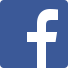

In [18]:
soup.prettify

In [57]:
info = soup.find_all('div', class_='meta-value')

In [58]:
#director
for directors in info[2].find_all('a'):
    print(directors.text)

Ryan Coogler


In [59]:
#writers
num_writer = []
for writers in info[3].find_all('a'):
    num_writer.append(writers.text)
num_writer

['Joe Robert ColeJoe Robert Cole', 'Ryan CooglerRyan Coogler']

In [88]:
#Released in theaters
info[4].time.string

'Feb 16, 2018'

In [92]:
#box office total
info[6].text

'$501,105,037'

In [99]:
#movie duration
info[7].time.text.split('\n')[1].strip()

'135 minutes'

In [75]:
actor_info = soup.find_all('section', id='movie-cast')

In [76]:
counter = 0
actors_list = []
for actors in actor_info[0].find_all('span'):
    actors_list.append(actors.text.split('\n'))
    counter+=1

In [104]:
actors_list

[['', '                Chadwick Boseman', '            '],
 ['',
  'as',
  '                ',
  "                    T'Challa/Black Panther",
  '                ',
  '            ',
  '        '],
 ['', '                Michael B. Jordan', '            '],
 ['',
  'as',
  '                ',
  '                    Erik Killmonger',
  '                ',
  '            ',
  '        '],
 ['', "                Lupita Nyong'o", '            '],
 ['',
  'as',
  '                ',
  '                    Nakia',
  '                ',
  '            ',
  '        '],
 ['', '                Danai Gurira', '            '],
 ['',
  'as',
  '                ',
  '                    Okoye',
  '                ',
  '            ',
  '        '],
 ['', '                Martin Freeman', '            '],
 ['',
  'as',
  '                ',
  '                    Everett K. Ross',
  '                ',
  '            ',
  '        '],
 ['', '                Daniel Kaluuya', '            '],
 ['',
  

In [114]:
actor_info[0].find_all('span')
all_actors = []
for name in actor_info[0].find_all('span'):
    all_actors.append(name.string)

In [122]:
actresses = []
for names in all_actors[::2]:
    actresses.append(names)
actresses

['\n                Chadwick Boseman\n            ',
 '\n                Michael B. Jordan\n            ',
 "\n                Lupita Nyong'o\n            ",
 '\n                Danai Gurira\n            ',
 '\n                Martin Freeman\n            ',
 '\n                Daniel Kaluuya\n            ',
 '\n                Letitia Wright\n            ',
 '\n                Winston Duke\n            ',
 '\n                Sterling K. Brown\n            ',
 '\n                Angela Bassett\n            ',
 '\n                Forest Whitaker\n            ',
 '\n                Andy Serkis\n            ',
 '\n                Florence Kasumba\n            ',
 '\n                John Kani\n            ',
 '\n                David S. Lee\n            ',
 '\n                Isaach De Bankolé\n            ',
 '\n                Connie Chiume\n            ',
 '\n                Danny Sapani\n            ',
 '\n                Marlana Carter\n            ',
 '\n                Sope Aluko\n  

In [108]:
all_actors = []
counter = 0
for names in actors_list:
    print(names)
#     all_actors.append(names[1].strip())
#     all_actors = all_actors[::2]

['', '                Chadwick Boseman', '            ']
['', 'as', '                ', "                    T'Challa/Black Panther", '                ', '            ', '        ']
['', '                Michael B. Jordan', '            ']
['', 'as', '                ', '                    Erik Killmonger', '                ', '            ', '        ']
['', "                Lupita Nyong'o", '            ']
['', 'as', '                ', '                    Nakia', '                ', '            ', '        ']
['', '                Danai Gurira', '            ']
['', 'as', '                ', '                    Okoye', '                ', '            ', '        ']
['', '                Martin Freeman', '            ']
['', 'as', '                ', '                    Everett K. Ross', '                ', '            ', '        ']
['', '                Daniel Kaluuya', '            ']
['', 'as', '                ', "                    W'Kabi", '                ', '        

In [100]:
all_actors = all_actors[::2]
all_actors

['Chadwick Boseman']